In [1]:
suppressMessages(library(ArchR))
ss <- function(x, pattern, slot = 1, ...) { sapply(strsplit(x = x, split = pattern, ...), '[', slot) }
options(stringsAsFactors = F)
options(repr.plot.width=11, repr.plot.height=8.5)

In [2]:
##################################
### set Arrow File parameters ####
addArchRThreads(threads = 10)
addArchRGenome("mm10")

Setting default number of Parallel threads to 10.

Setting default genome to Mm10.



In [3]:
PROJDIR='../../../data/raw_data/mm10/BICCN_mouse_caudoputamen'
ARCHDIR=file.path(PROJDIR,'ArchR_BICCN_CP')
proj = loadArchRProject(ARCHDIR)

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .____

# Make plots

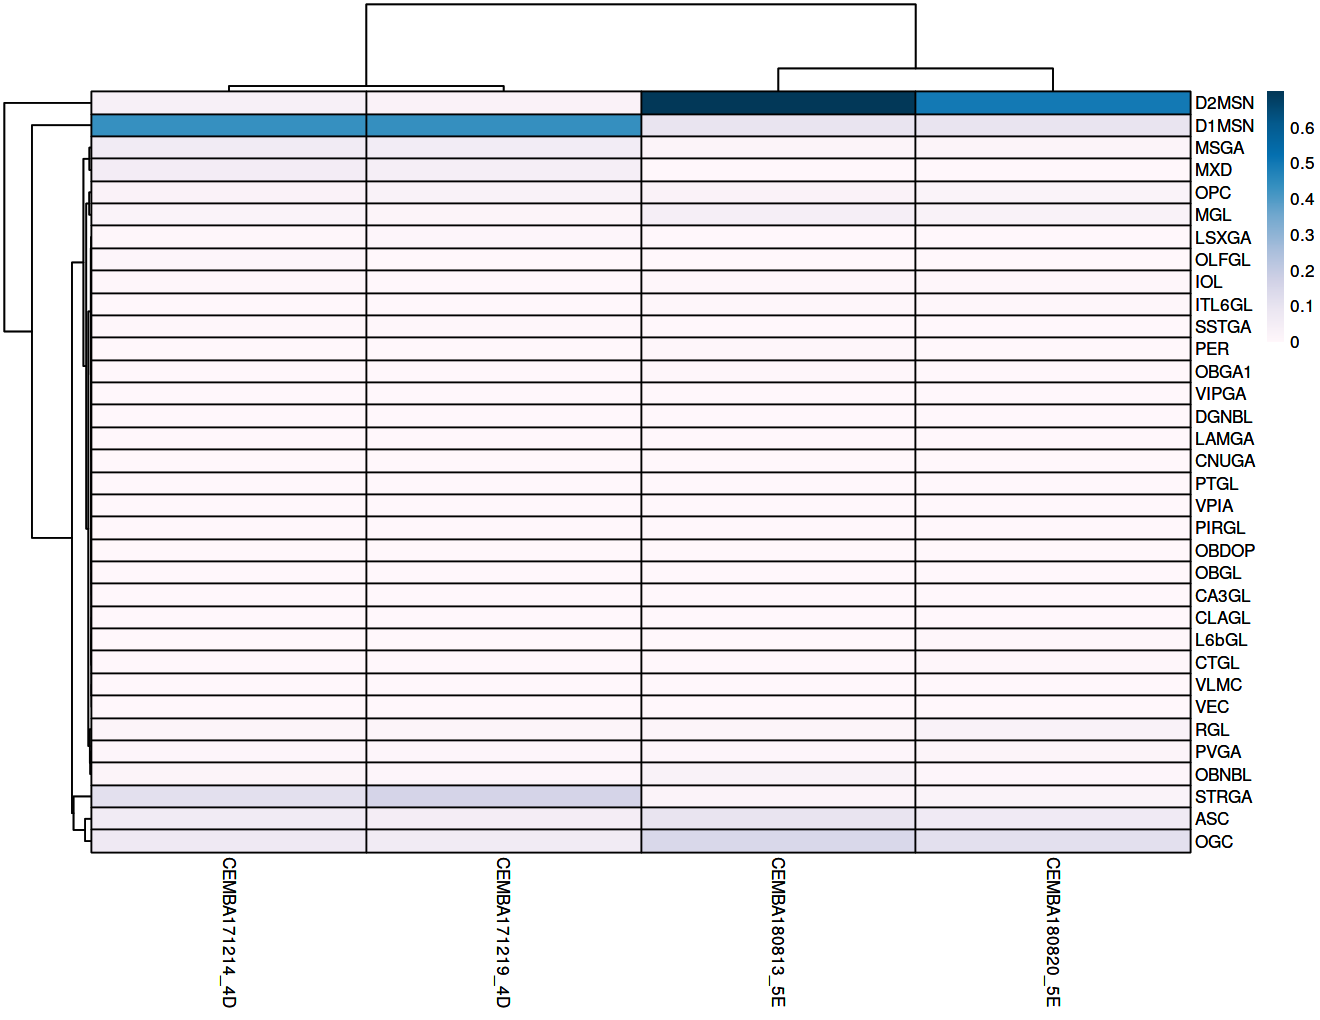

In [4]:
# plot the confusion matrix of cell types by subjects
cM <- confusionMatrix(paste0(proj$L2cluster), paste0(proj$Sample))
cM <- cM / Matrix::colSums(cM)
p <- pheatmap::pheatmap(
  mat = as.matrix(cM), 
  color = paletteContinuous("whiteBlue"), 
  border_color = "black")
p

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-45261567e753b-Date-2020-10-06_Time-07-12-27.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-45261567e753b-Date-2020-10-06_Time-07-12-27.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-452611597e9c-Date-2020-10-06_Time-07-12-28.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-452611597e9c-Date-2020-10-06_Time-07-12-28.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-452611f2febd0-Date-2020-10-06_Time-07-12-29.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : A

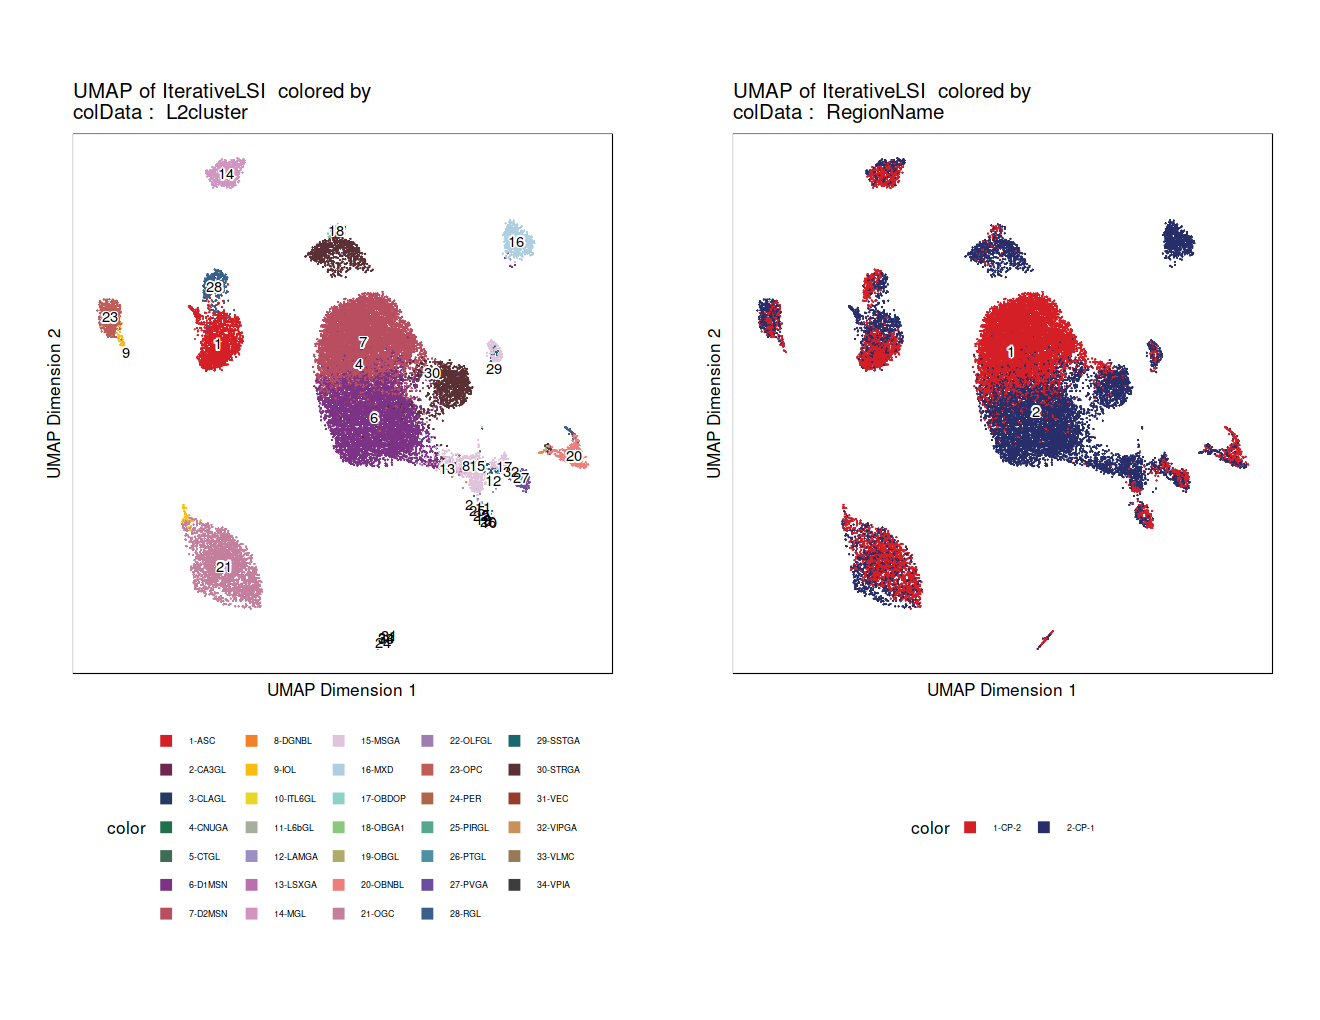

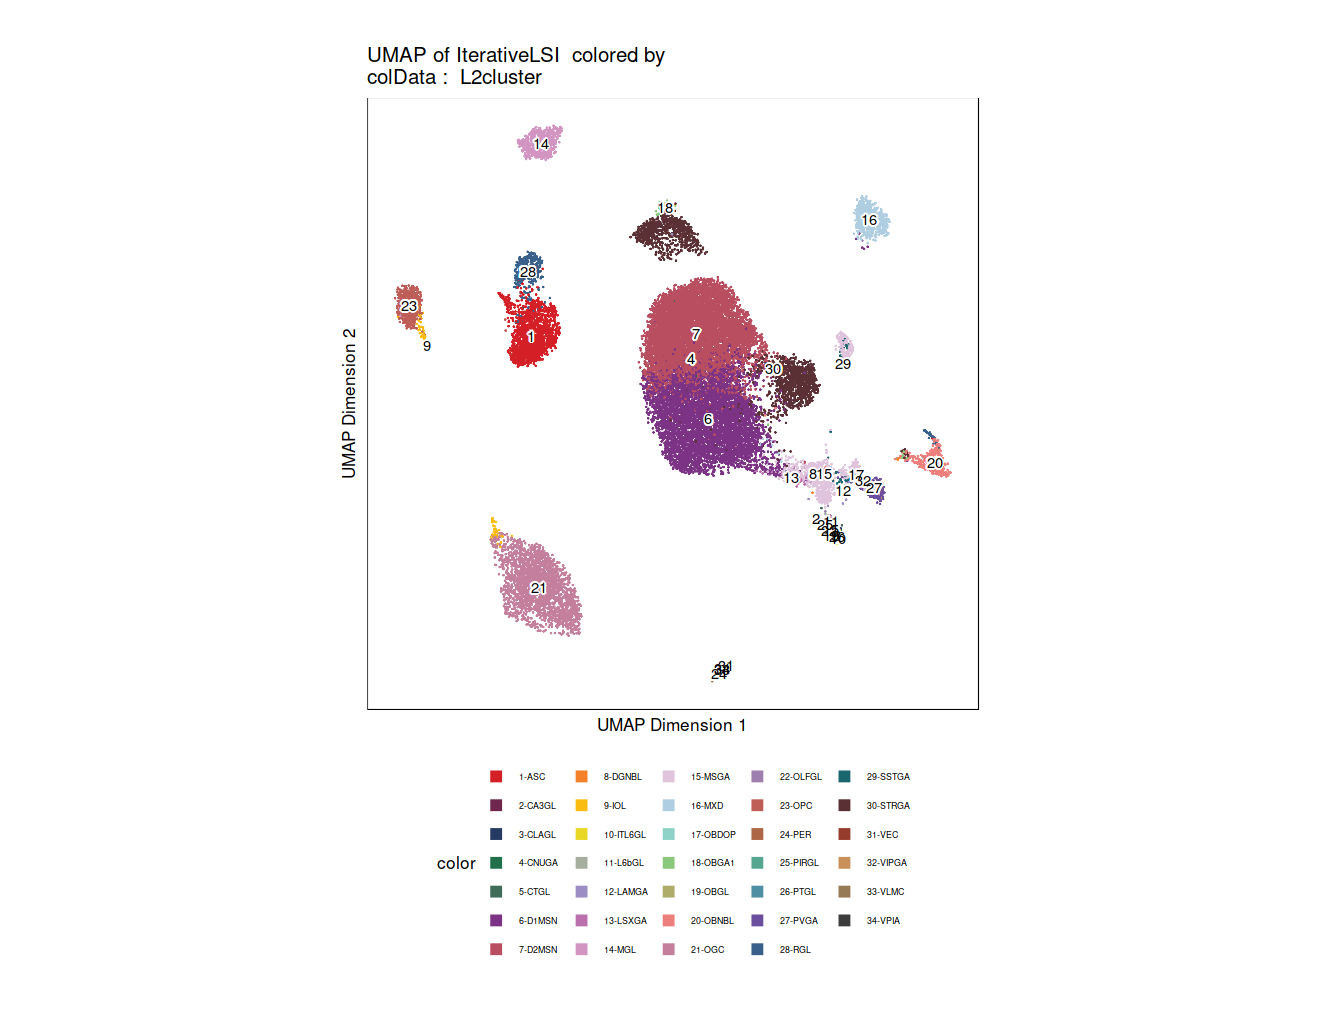

In [5]:
## make UMAP plots
p1 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "L2cluster", embedding = "UMAP")

p2 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "RegionName", embedding = "UMAP")

p3 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "Sample", embedding = "UMAP")
ggAlignPlots(p1, p2, type = "h")
p1

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-452614ac3dbd2-Date-2020-10-06_Time-07-12-39.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2020-10-06 07:12:39 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 
3 
4 
5 
6 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-452614ac3dbd2-Date-2020-10-06_Time-07-12-39.log



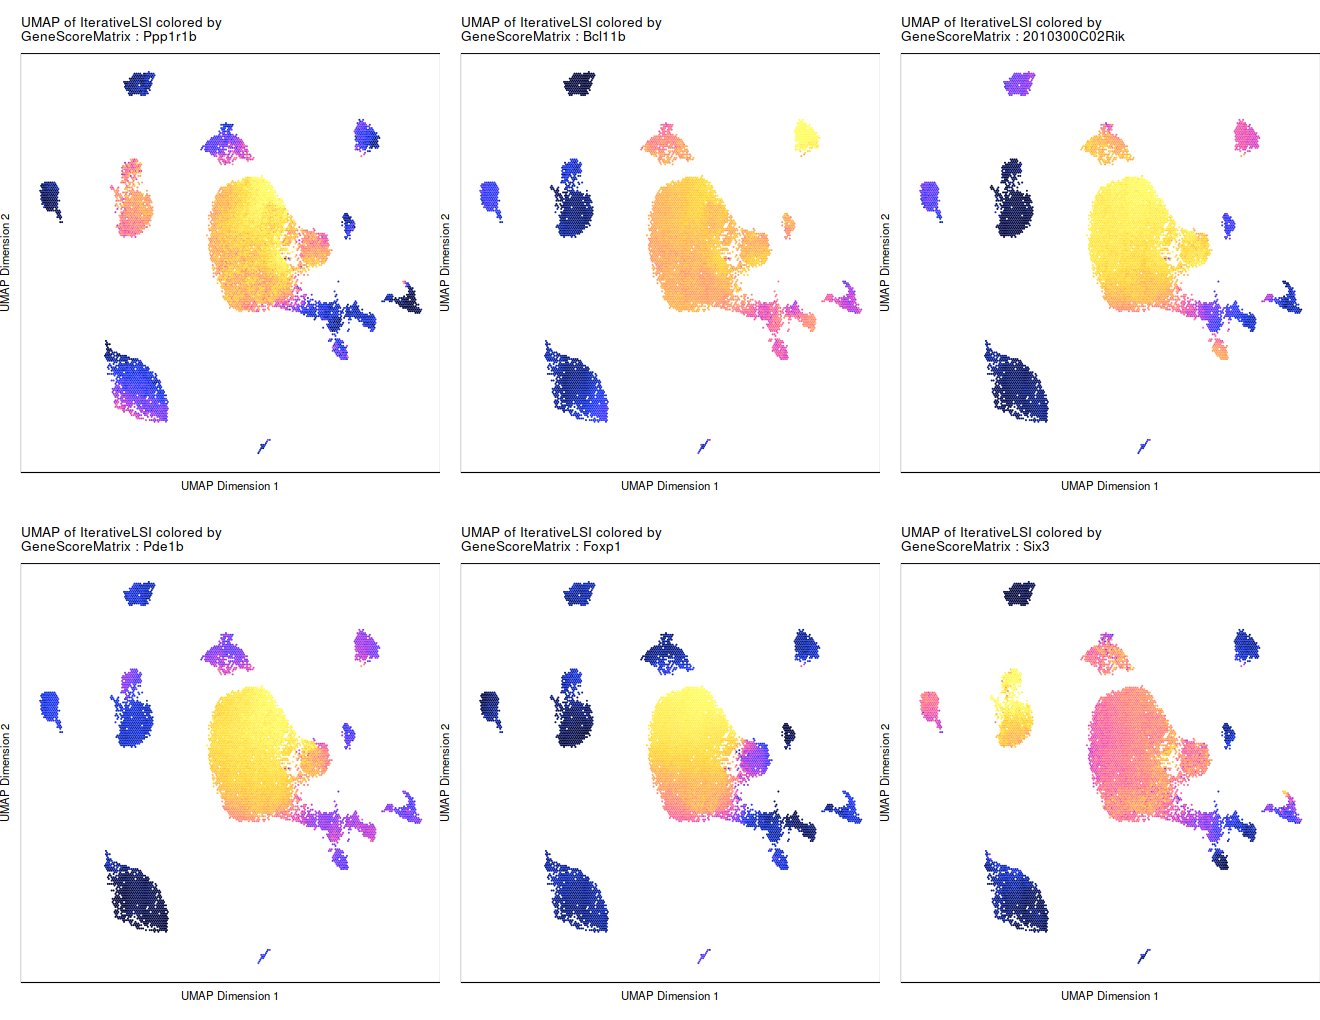

In [6]:
# Broad MSN marker, mouse 2010300C02Rik == human KIAA1211L
# MSN markers, Ppp1r1b = DARPP-32, Bcl11b=Ctip2
markMSN3 = c('Ppp1r1b','Bcl11b','2010300C02Rik','Pde1b','Foxp1','Six3' )
p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markMSN3, embedding = "UMAP")#, imputeWeights = NULL)
p3 <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p3))

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-452613ff4f8f4-Date-2020-10-06_Time-07-12-51.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2020-10-06 07:12:51 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 
3 
4 
5 
6 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-452613ff4f8f4-Date-2020-10-06_Time-07-12-51.log



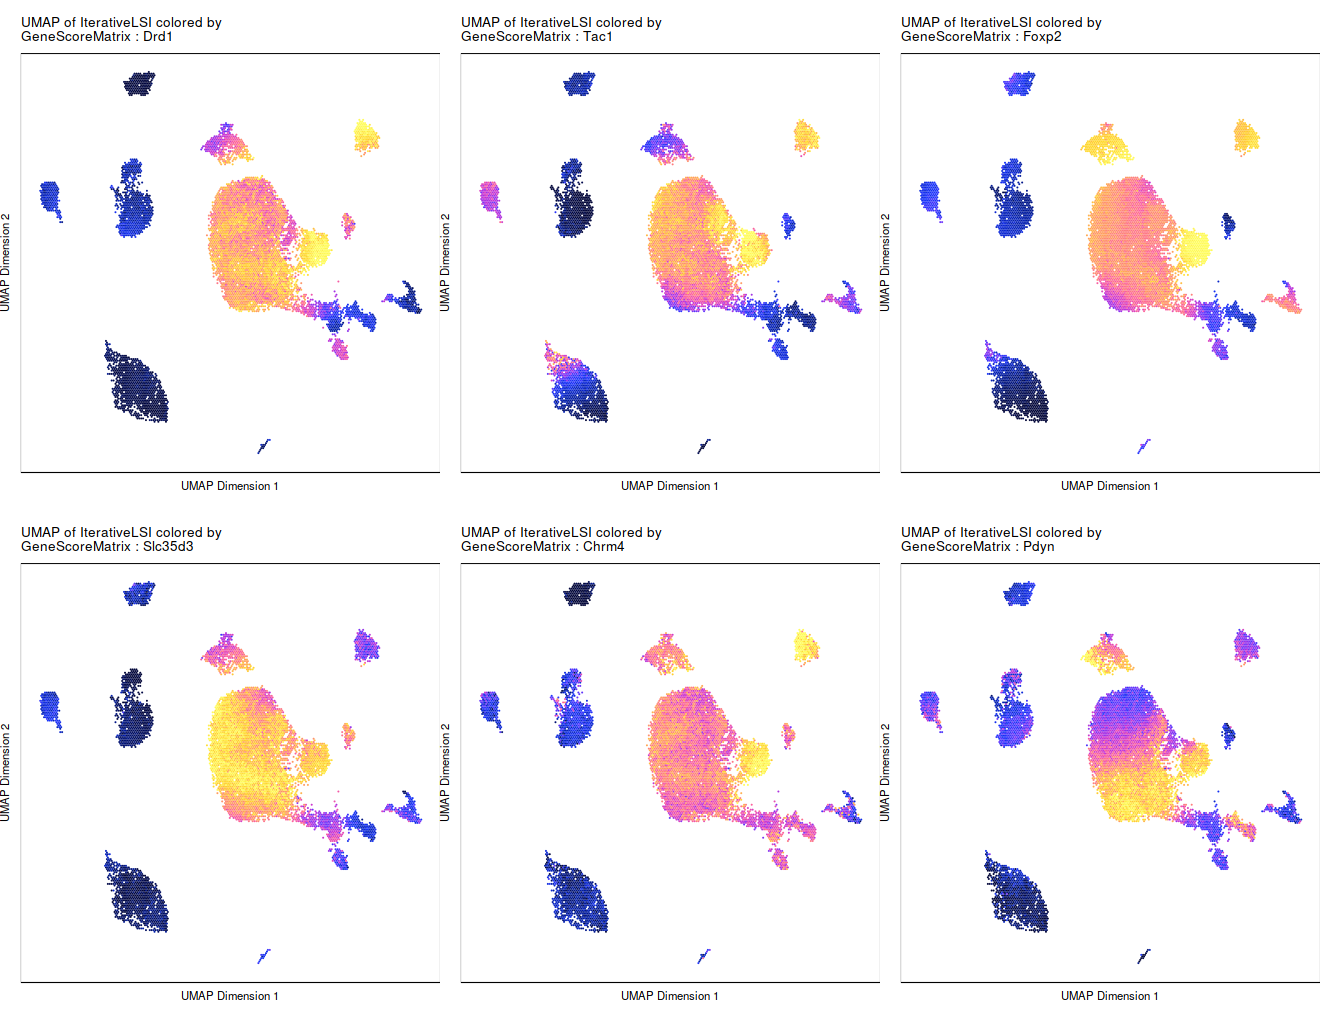

In [7]:
markMSN1 = c('Drd1','Tac1','Foxp2','Slc35d3','Chrm4', 'Pdyn') # D1 markers

# D1 MSN
p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markMSN1, embedding = "UMAP")#, imputeWeights = NULL) # 
p1 <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme( axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
           axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p1))

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-4526121c8ca94-Date-2020-10-06_Time-07-13-01.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2020-10-06 07:13:01 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 
3 
4 
5 
6 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-4526121c8ca94-Date-2020-10-06_Time-07-13-01.log



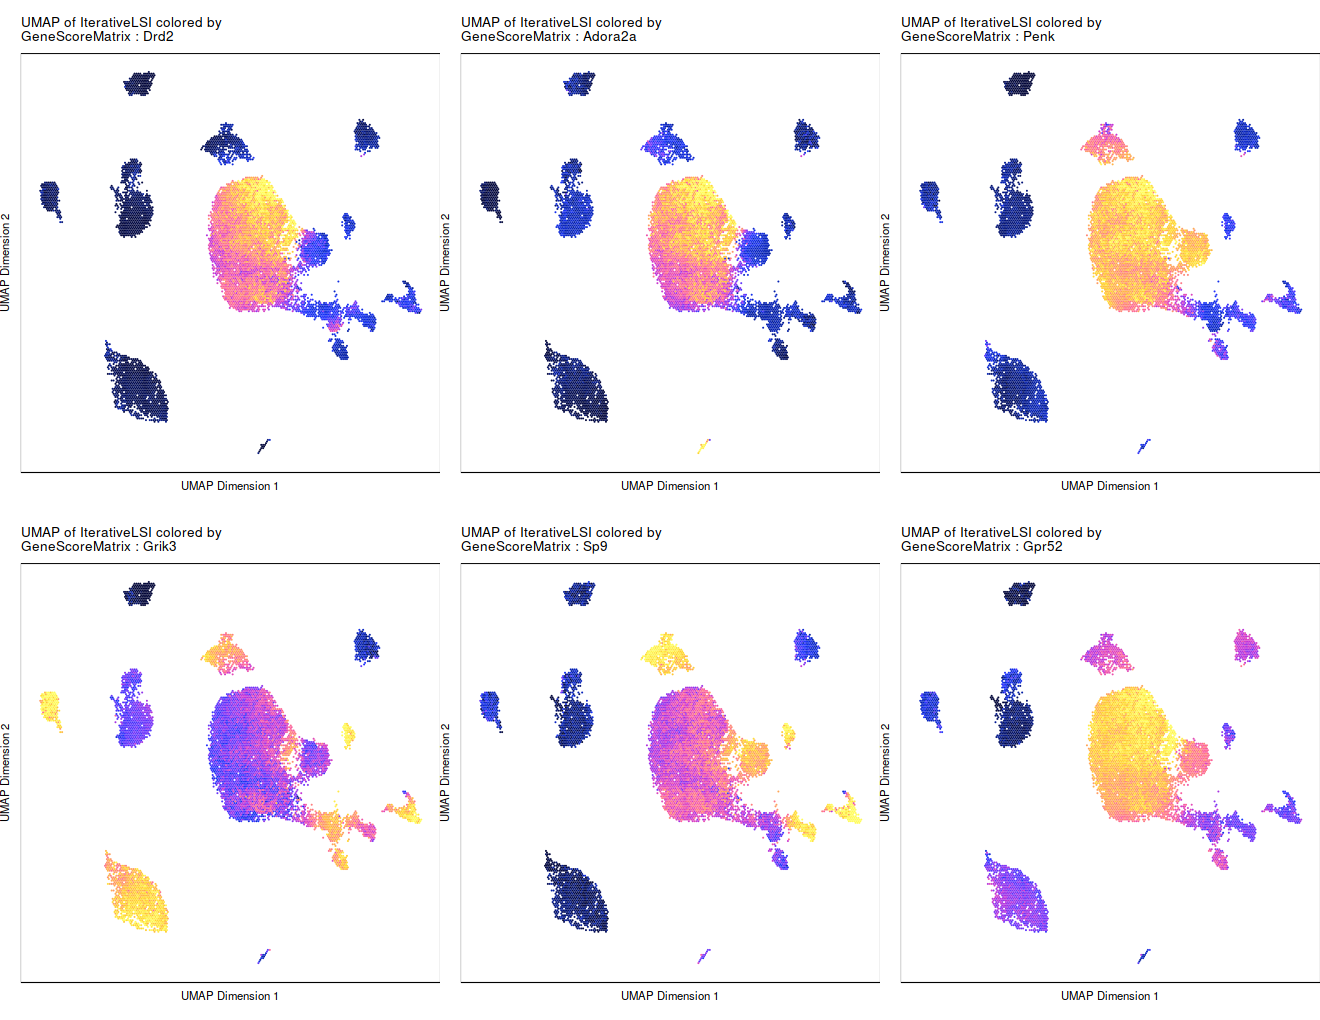

In [8]:
markMSN2 = c('Drd2','Adora2a','Penk', 'Grik3', 'Sp9', 'Gpr52')# D2 markers

# D2 MSN
p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markMSN2, embedding = "UMAP")#, imputeWeights = NULL)
p2 <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))


Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-4526153e6d811-Date-2020-10-06_Time-07-13-12.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2020-10-06 07:13:12 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 
3 
4 
5 
6 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-4526153e6d811-Date-2020-10-06_Time-07-13-12.log



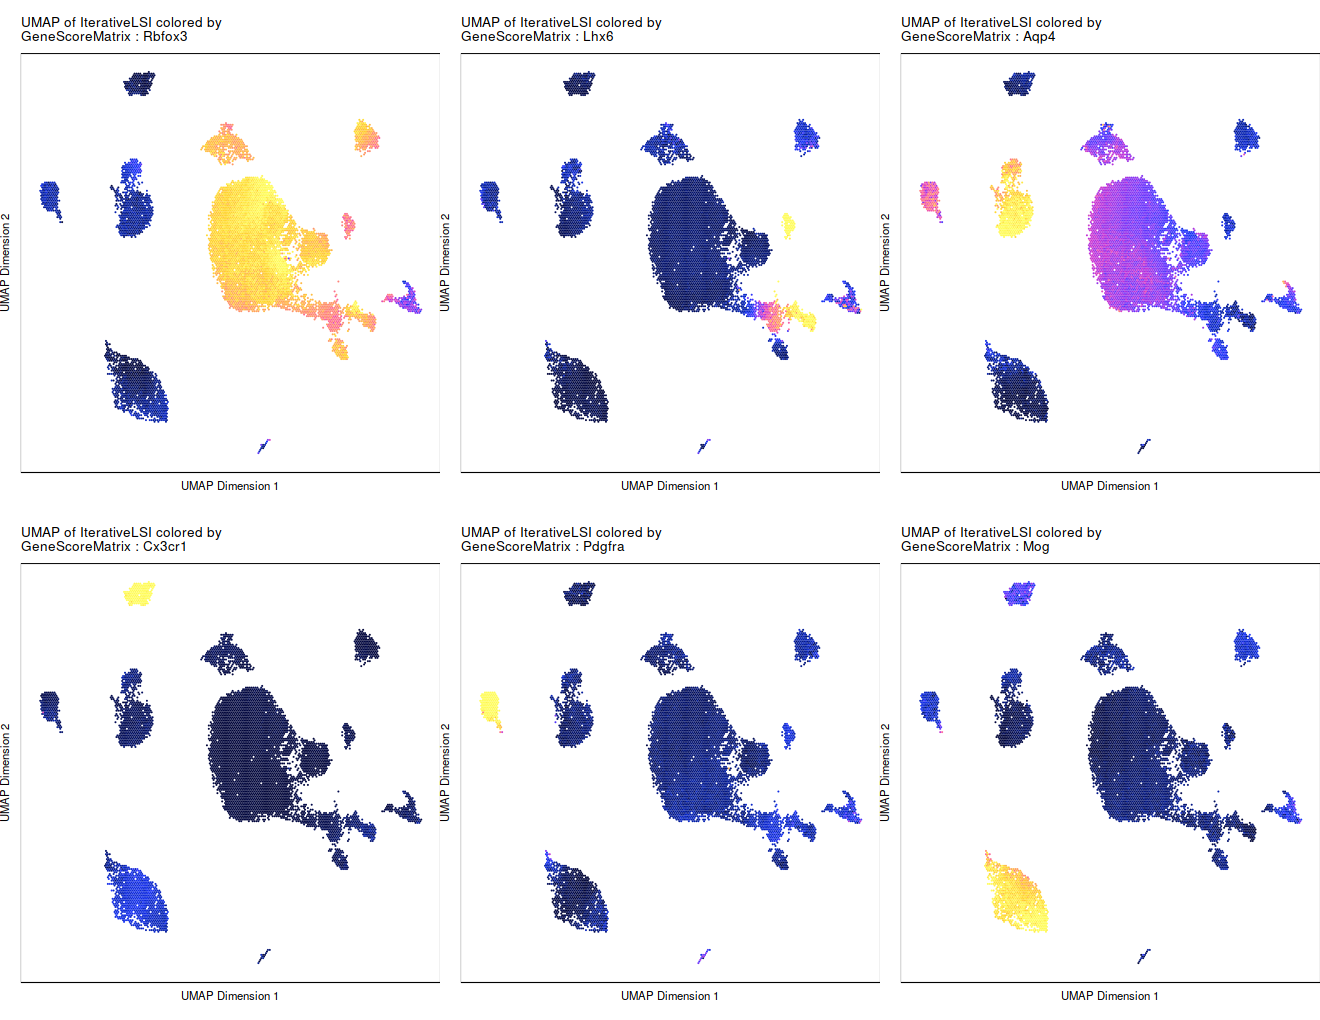

In [9]:
## Neuron vs. Glia markers
markerGenes1  <- c('Rbfox3', # Neuron
                   'Lhx6', #Interneuron
                   'Aqp4', # Astrocyte
                   'Cx3cr1', # Microglia
                   'Pdgfra', #OPC
                   'Mog' # Oligo
                  )

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markerGenes1, embedding = "UMAP") #, imputeWeights = NULL)
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p))

# Relabel cluster and call peaks

In [13]:
############################################
# using marker gene scores, give cluster names
remapClust <- c(
    'CNUGA' = 'Drop',
    'CTGL' = 'Drop',
    'CA3GL' = 'Drop',
    'CLAGL' = 'Drop',
    'DGNBL'  = 'Drop',
    'IOL' = 'Drop',
    'ITL6GL' = 'Drop',
    'L6bGL' = 'Drop',
    'LSXGA'  = 'Drop', 
    'PIRGL'= 'Drop',
    'PTGL' = 'Drop',
    'OBDOP' = 'Drop',
    'OBGA1' = 'Drop',
    'OBGL' = 'Drop',
    'OBNBL'  = 'Drop',
    'OLFGL'  = 'Drop',
    'VPIA'= 'Drop',

    'D1MSN' = 'MSN_D1',
    'D2MSN' = 'MSN_D2',
    'MXD' = 'MSN_D1',
    'STRGA'  = 'MSN_UNK2',

    'MSGA'  = 'Interneuron',    
    'LAMGA'= 'Interneuron',
    'PVGA'  = 'Interneuron',
    'SSTGA' = 'Interneuron',
    'VIPGA' = 'Interneuron',
    
    'ASC' = 'Astro',
    'RGL' = 'Astro',
    'OPC'  = 'OPC',
    'OGC' = 'Oligo',
    'MGL' = 'Microglia',
    'PER' = 'Mural',
    'VEC' = 'Mural',
    'VLMC' = 'VLMC')
proj$Clusters2 <- mapLabels(proj$L2cluster, newLabels = remapClust, 
                            oldLabels = names(remapClust))
table(proj$Clusters2)


      Astro        Drop Interneuron   Microglia      MSN_D1      MSN_D2 
       1948         773        1170         595        6613        7292 
   MSN_UNK2       Mural       Oligo         OPC        VLMC 
       1821          74        2310         525          18 

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-452612b8fa8bc-Date-2020-10-06_Time-07-35-45.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-452612b8fa8bc-Date-2020-10-06_Time-07-35-45.log



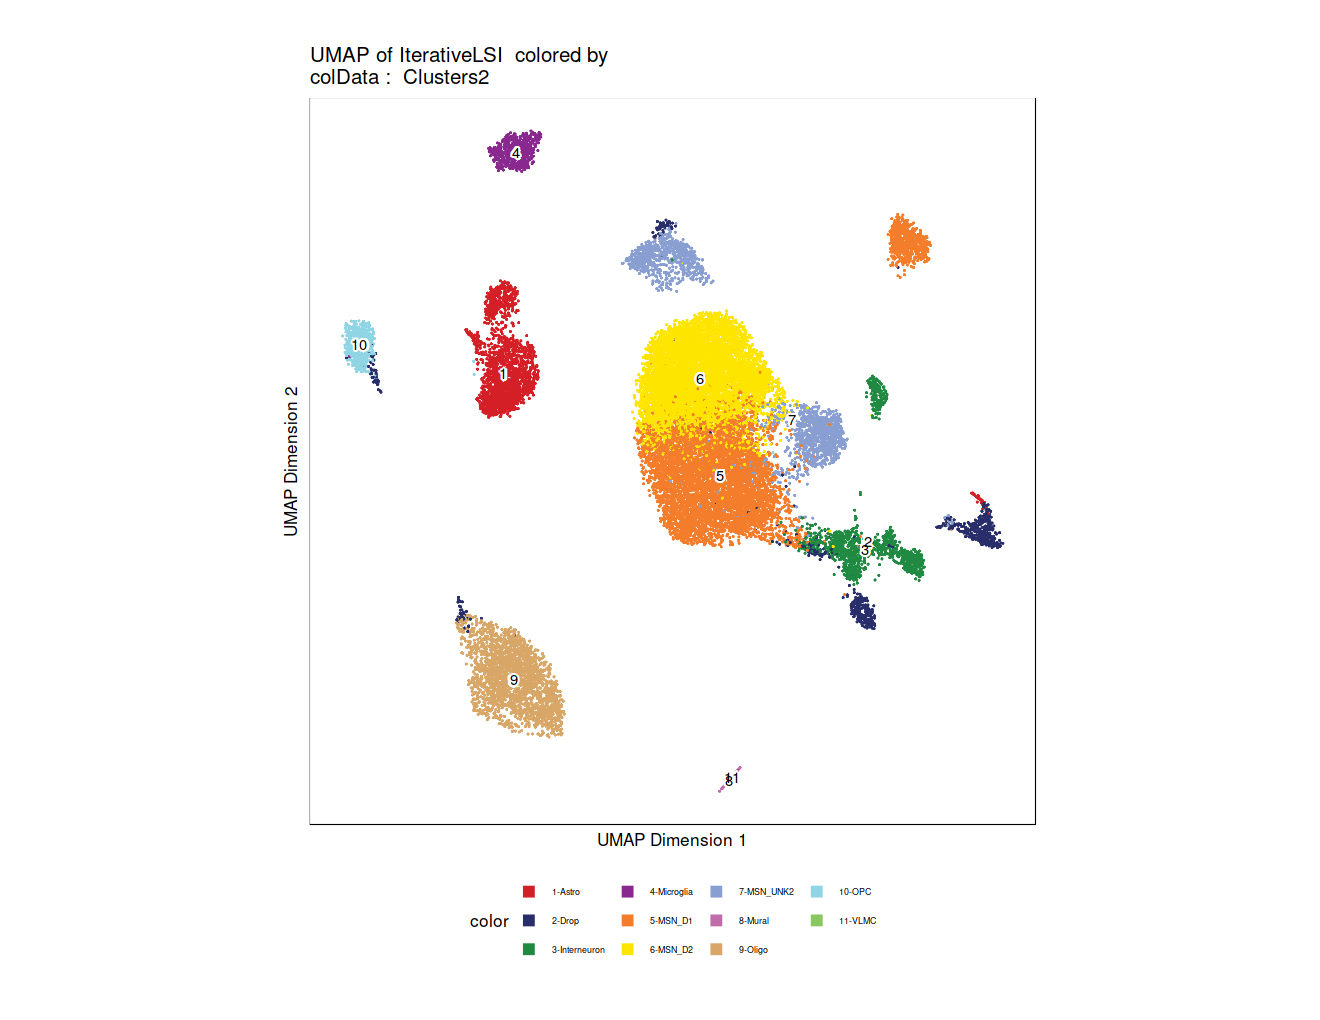

In [14]:
## make UMAP plots
p1 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "Clusters2", embedding = "UMAP")
p1

In [15]:
# drop the drop clusters
ARCHDIR2=file.path(PROJDIR,'ArchR_BICCN_CP_labeled')
idxSample <- BiocGenerics::which(proj$Clusters2 %ni% "Drop")
cellsSample <- proj$cellNames[idxSample]

proj2 = subsetArchRProject(
  ArchRProj = proj,
  cells = cellsSample,
  outputDirectory = ARCHDIR2
)

Copying ArchRProject to new outputDirectory : /home/bnphan/projects/snATAC_cross_species_caudate/data/raw_data/mm10/BICCN_mouse_caudoputamen/ArchR_BICCN_CP_labeled

Copying Arrow Files...

Getting ImputeWeights

Dropping ImputeWeights...

Copying Other Files...

Copying Other Files (1 of 2): Embeddings

Copying Other Files (2 of 2): IterativeLSI

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /           

In [16]:
# make group coverage, call peaks, and 
proj2<-addGroupCoverages(proj2, groupBy="Clusters2", force = TRUE)

ArchR logging to : ArchRLogs/ArchR-addGroupCoverages-45261768878d9-Date-2020-10-06_Time-07-42-46.log
If there is an issue, please report to github with logFile!

Astro (1 of 10) : CellGroups N = 4

Interneuron (2 of 10) : CellGroups N = 4

Microglia (3 of 10) : CellGroups N = 4

MSN_D1 (4 of 10) : CellGroups N = 4

MSN_D2 (5 of 10) : CellGroups N = 4

MSN_UNK2 (6 of 10) : CellGroups N = 4

Mural (7 of 10) : CellGroups N = 2

Oligo (8 of 10) : CellGroups N = 4

OPC (9 of 10) : CellGroups N = 4

VLMC (10 of 10) : CellGroups N = 2

2020-10-06 07:42:48 : Creating Coverage Files!, 0.027 mins elapsed.

2020-10-06 07:42:48 : Batch Execution w/ safelapply!, 0.027 mins elapsed.

2020-10-06 07:52:42 : Adding Kmer Bias to Coverage Files!, 9.927 mins elapsed.

Completed Kmer Bias Calculation

Adding Kmer Bias (1 of 36)

Adding Kmer Bias (2 of 36)

Adding Kmer Bias (3 of 36)

Adding Kmer Bias (4 of 36)

Adding Kmer Bias (5 of 36)

Adding Kmer Bias (6 of 36)

Adding Kmer Bias (7 of 36)

Adding Kmer 

In [17]:
# call peaks 
proj2<-addReproduciblePeakSet(proj2, groupBy = "Clusters2", plot = FALSE)

Searching For MACS2..

Found with $path!

ArchR logging to : ArchRLogs/ArchR-addReproduciblePeakSet-452615df72a04-Date-2020-10-06_Time-08-01-58.log
If there is an issue, please report to github with logFile!

Calling Peaks with Macs2

2020-10-06 08:01:58 : Peak Calling Parameters!, 0.004 mins elapsed.



                  Group nCells nCellsUsed nReplicates nMin nMax maxPeaks
Astro             Astro   1948       1781           4  369  500   150000
Interneuron Interneuron   1170       1170           4  141  451   150000
Microglia     Microglia    595        595           4   85  242   150000
MSN_D1           MSN_D1   6613       2000           4  500  500   150000
MSN_D2           MSN_D2   7292       1347           4  153  500   150000
MSN_UNK2       MSN_UNK2   1821       1219           4  108  500   150000
Mural             Mural     74         64           2   40   40    32000
Oligo             Oligo   2310       1790           4  380  500   150000
OPC                 OPC    525        525           4  108  142   150000
VLMC               VLMC     18         18           2   13   17     9000


2020-10-06 08:01:58 : Batching Peak Calls!, 0.004 mins elapsed.

2020-10-06 08:01:58 : Batch Execution w/ safelapply!, 0 mins elapsed.

2020-10-06 08:35:21 : Identifying Reproducible Peaks!, 33.379 mins elapsed.

2020-10-06 08:36:09 : Creating Union Peak Set!, 34.178 mins elapsed.

Converged after 7 iterations!

2020-10-06 08:36:13 : Finished Creating Union Peak Set (267329)!, 34.243 mins elapsed.



In [18]:
# add peak counts matrix 
proj2 <- addPeakMatrix(proj2)

ArchR logging to : ArchRLogs/ArchR-addPeakMatrix-452617f12f97d-Date-2020-10-06_Time-08-36-13.log
If there is an issue, please report to github with logFile!

2020-10-06 08:36:13 : Batch Execution w/ safelapply!, 0 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-addPeakMatrix-452617f12f97d-Date-2020-10-06_Time-08-36-13.log



In [19]:
# add motif enrichment matrix
proj2 <- addMotifAnnotations(ArchRProj = proj2, motifSet = "cisbp", name = "Motif")

No methods found in package ‘IRanges’ for request: ‘score’ when loading ‘TFBSTools’

ArchR logging to : ArchRLogs/ArchR-addMotifAnnotations-452613269faab-Date-2020-10-06_Time-08-39-02.log
If there is an issue, please report to github with logFile!

2020-10-06 08:39:04 : Gettting Motif Set, Species : Mus musculus, 0.002 mins elapsed.

Using version 2 motifs!

2020-10-06 08:39:06 : Finding Motif Positions with motifmatchr!, 0.037 mins elapsed.

2020-10-06 08:43:07 : Creating Motif Overlap Matrix, 4.057 mins elapsed.

2020-10-06 08:43:12 : Finished Getting Motif Info!, 4.139 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-addMotifAnnotations-452613269faab-Date-2020-10-06_Time-08-39-02.log



In [20]:
# add motif deviations matrix
proj2 <- addBgdPeaks(proj2)
proj2 <- addDeviationsMatrix(proj2,  peakAnnotation = "Motif", force = TRUE)

Identifying Background Peaks!

Using Previous Background Peaks!

ArchR logging to : ArchRLogs/ArchR-addDeviationsMatrix-45261533a5d35-Date-2020-10-06_Time-08-43-30.log
If there is an issue, please report to github with logFile!



NULL


2020-10-06 08:43:35 : Batch Execution w/ safelapply!, 0 mins elapsed.

###########
2020-10-06 09:39:04 : Completed Computing Deviations!, 55.567 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-addDeviationsMatrix-45261533a5d35-Date-2020-10-06_Time-08-43-30.log



In [21]:
# add co-accessibility matrix
proj2 <- addCoAccessibility(proj2, reducedDims = "Harmony", dimsToUse = 1:30,
                           scaleDims = TRUE, corCutOff = 0.75, k = 100, 
                           knnIteration = 500, overlapCutoff = 0.8, 
                           maxDist = 1e+05, scaleTo = 10^4, log2Norm = TRUE)

ArchR logging to : ArchRLogs/ArchR-addCoAccessibility-4526115bfbe39-Date-2020-10-06_Time-09-39-06.log
If there is an issue, please report to github with logFile!

2020-10-06 09:39:06 : Computing KNN, 0.003 mins elapsed.

2020-10-06 09:39:06 : Identifying Non-Overlapping KNN pairs, 0.009 mins elapsed.

2020-10-06 09:39:08 : Identified 496 Groupings!, 0.046 mins elapsed.

2020-10-06 09:39:13 : Computing Co-Accessibility chr1 (1 of 20), 0.124 mins elapsed.

2020-10-06 09:39:22 : Computing Co-Accessibility chr2 (2 of 20), 0.269 mins elapsed.

2020-10-06 09:39:29 : Computing Co-Accessibility chr3 (3 of 20), 0.391 mins elapsed.

2020-10-06 09:39:35 : Computing Co-Accessibility chr4 (4 of 20), 0.497 mins elapsed.

2020-10-06 09:39:42 : Computing Co-Accessibility chr5 (5 of 20), 0.615 mins elapsed.

2020-10-06 09:39:49 : Computing Co-Accessibility chr6 (6 of 20), 0.731 mins elapsed.

2020-10-06 09:39:56 : Computing Co-Accessibility chr7 (7 of 20), 0.836 mins elapsed.

2020-10-06 09:40:03 : Com

In [22]:
proj2 = saveArchRProject(ArchRProj = proj2)

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
         